In [39]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [43]:
full = []
medium = []
simple = []

# ts_100 = ThompsonSampling.load_pickle("data/thompson_sampling/TS-100.pkl")
# ts_100 = FullThompsonSampling(create_model(Simplification.NONE), {i: np.sum(ep.rewards) for i, ep in enumerate(ts_100.episodes)}, {}, {i*100: ts_100.episodes[i*100].policy for i in range(len(ts_100.episodes) // 100)}, ts_100.name, ts_100.info)
# ts_100.save()

for i in range(3):
    full.append(FullThompsonSampling.load(f"data/dir_ts/None-{i}.pkl.gz"))
    medium.append(DirThompsonSampling.load(f"data/dir_ts/Medium-{i}.pkl.gz"))
    simple.append(DirThompsonSampling.load(f"data/dir_ts/Simple-{i}.pkl.gz"))
    
# full.append(DirThompsonSampling.load("data/dir_ts/TS-100.pkl.gz"))
    

In [ ]:
plt.figure(figsize=(8, 6))
models = full
for model in models:
    plt.plot(list(model.policies.keys()), model.get_mean_rewards(10000), color='green', alpha=0.2)
    model.save()
models = medium
for model in models:
    plt.plot(list(model.policies.keys()), model.get_mean_rewards(10000), color='red', alpha=0.2)
    model.save()
models = simple
for model in models:
    plt.plot(list(model.policies.keys()), model.get_mean_rewards(10000), color='blue', alpha=0.2)
    model.save()
# plt.scatter(list(model.policies.keys()), model.get_mean_rewards(10000), label=model.name)
# plt.plot(list(simple.policies.keys()), dqn_rewards, label='DQN', alpha=0.2)
# Add labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.title('Mean Rewards at each new policy')
# plt.xscale('log', base=2)
# plt.xscale('log', base=10)
# plt.legend()
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()

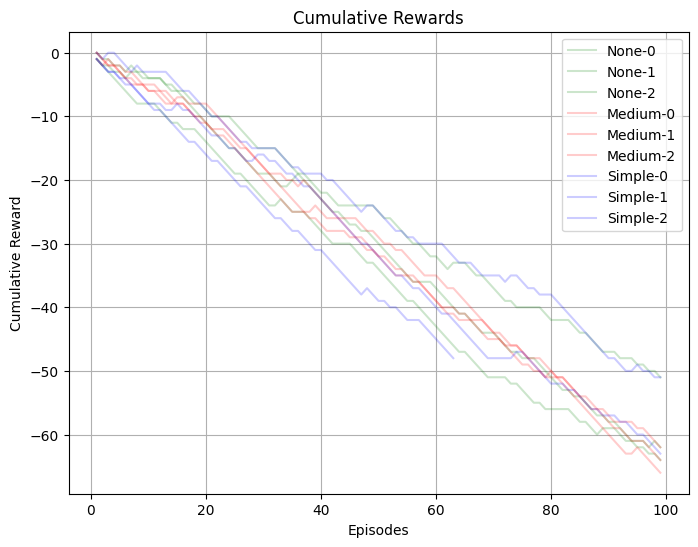

In [42]:
plt.figure(figsize=(8, 6))
for i, models in enumerate([full, medium, simple]):
    color = ['green', 'red', 'blue'][i]
    for model in models:
        plt.plot(list(model.rewards.keys()), np.cumsum([model.rewards[i] for i in list(model.rewards.keys())]), label=model.name,  alpha=0.2, color=color)
# plt.plot(list(full.policies.keys()), dqn_rewards, label='DQN', alpha=0.2)
# Add labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards')
plt.legend()
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()